In [38]:
#import primary modules
import pandas as pd 
import numpy as np 
from scipy.stats import ttest_ind
#import matplotlib & inline
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
#import seaborn 
import seaborn as sns

The dataset contains students performance and status. The data presents gender, race, parental level of education lunch and preparation of student.

source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


In [2]:
#data read into a pandas dataframe 
df = pd.read_csv('StudentsPerformance.csv')

1. cleaning and changing formats

In [3]:
#Checking data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


no nulls are found 

In [46]:
#view the top 5 rows of the dataset 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3
4,male,group C,some college,standard,none,76,78,75,76.3


In [5]:
#view column names 
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

changing formats 

In [17]:
# checking if all the columns are str type
all(isinstance(column, str) for column in df.columns)

True

2. Analyze and visualization 

First, let's compare average math score by genders

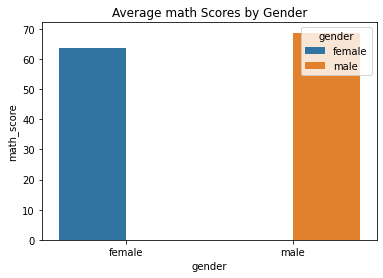

             mean     median        std
       math score math score math score
gender                                 
female  63.633205         65  15.491453
male    68.728216         69  14.356277


In [48]:
#creat new dataframe and grouping it by gender
new_df = df.groupby(['gender'])['math score'].mean().reset_index()
sns.barplot( x = 'gender', y = 'math score', hue = 'gender', data=new_df)
plt.xlabel('gender')
plt.ylabel('math_score')
plt.title('Average math Scores by Gender') 

plt.show()

pivot_table = df.pivot_table(index='gender', values='math score', aggfunc=['mean', 'median', 'std'])
print(pivot_table)


The result shows that the male students received higher average math score compare to female students
let's compare other subjects other than math

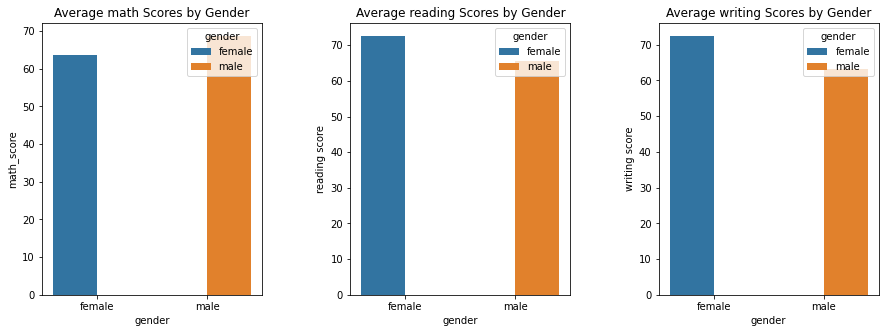

In [7]:
#create new dataframe by group of gender and compare average score per subject
#using subplot to visualize three graphs at once
fig = plt.figure(figsize = (15,5))

ax0 = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot (1, 3, 2)
ax2 = fig.add_subplot (1, 3, 3)
#adding space between each graphs
plt.subplots_adjust(wspace = 0.4)

#subplot1 : math score 
new_df = df.groupby(['gender'])['math score'].mean().reset_index()
sns.barplot( x = 'gender', y = 'math score', hue = 'gender', data=new_df, ax=ax0)
ax0.set_xlabel('gender')
ax0.set_ylabel('math_score')
ax0.set_title('Average math Scores by Gender') 

#subplot2 : reading score
new_df1 = df.groupby(['gender'])['reading score'].mean().reset_index()
sns.barplot( x = 'gender', y = 'reading score', hue = 'gender', data=new_df1, ax=ax1)
ax1.set_xlabel('gender')
ax1.set_ylabel('reading score')
ax1.set_title('Average reading Scores by Gender') 

#subplot3: writing score
new_df2 = df.groupby(['gender'])['writing score'].mean().reset_index()
sns.barplot( x = 'gender', y = 'writing score', hue = 'gender', data=new_df2, ax=ax2)
ax2.set_xlabel('gender')
ax2.set_ylabel('writing score')
ax2.set_title('Average writing Scores by Gender') 

plt.show()



Graphs shows that male students received higher score in math, but lower in reading and writing compare to female students

In [8]:
#adding total score column for easier plotting

total_score = df['reading score']+ df['math score']+ df['writing score']
total_ave_score = total_score / 3 
total_ave_score

df['total score'] = round(total_ave_score, 1)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3
4,male,group C,some college,standard,none,76,78,75,76.3


let's find out if parental level of education has an effect on their child's performance in study


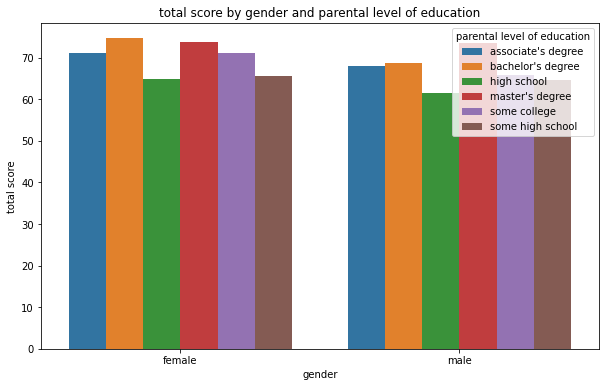

In [9]:
#create new dataframe by group of parental level of education, also gender for consistency 
df_df = df.groupby(['parental level of education', 'gender'])['total score'].mean().reset_index()
plt.figure(figsize = (10,6))
sns.barplot(x='gender', y='total score', hue = 'parental level of education', data=df_df)
plt.xlabel('gender')
plt.ylabel('total score')
plt.title('total score by gender and parental level of education')
plt.show()

In [22]:
#pivot table for female and male student distinction 
pivot_table = df.pivot_table(index=['parental level of education', 'gender'], values='total score', aggfunc=['mean', 'median', 'std'])
print(pivot_table)

                                          mean      median         std
                                   total score total score total score
parental level of education gender                                    
associate's degree          female   71.124138       71.30   13.351324
                            male     67.865094       68.85   13.867406
bachelor's degree           female   74.673016       73.70   14.219151
                            male     68.780000       68.00   13.064759
high school                 female   64.750000       66.00   14.148975
                            male     61.578431       62.50   12.779320
master's degree             female   73.647222       71.20   14.697084
                            male     73.517391       77.00   11.998888
some college                female   71.000000       72.00   12.773965
                            male     65.712963       65.15   14.221085
some high school            female   65.564835       68.70   16.531877
      

In [23]:
#pivot table for overall students
pivot_table = df.pivot_table(index=['parental level of education'], values='total score', aggfunc=['mean', 'median', 'std'])
print(pivot_table)

                                   mean      median         std
                            total score total score total score
parental level of education                                    
associate's degree            69.568018       69.70   13.667010
bachelor's degree             71.926271       71.15   13.951175
high school                   63.099490       65.00   13.512477
master's degree               73.596610       73.30   13.600076
some college                  68.473451       68.70   13.712479
some high school              65.104469       66.70   14.982086


Overall, the result shows that parental level of education has an effect on their child's performance however, for female students, parents with bachelor's degree received higher average score compare to parents with master's degree.

let's find out if preparation course has any relationship between test score


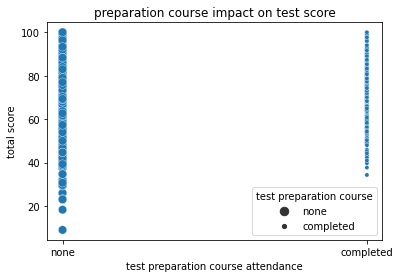

                               mean      median         std
                        total score total score total score
test preparation course                                    
completed                 72.669553        73.5   13.038673
none                      65.037539        65.3   14.185340
T-statistic: 8.392785503570561
P-value: 1.6100509035985566e-16


In [42]:
#Scatter plot for preparation course and total score
size = df['test preparation course']
sns.scatterplot(data = df, x = 'test preparation course', y = 'total score', size = size)
plt.xlabel('test preparation course attendance')
plt.ylabel('total score')
plt.title('preparation course impact on test score')
plt.show()
#pivot table 
pivot_table = df.pivot_table(index='test preparation course', values='total score', aggfunc=['mean', 'median', 'std'])
print(pivot_table)
#create two dinstinct group by preparation test completion status 
group_prepared = df[df['test preparation course'] == 'completed']['total score']
group_not_prepared = df[df['test preparation course'] == 'none']['total score']
#T-test 
t_statistic, p_value = ttest_ind(group_prepared, group_not_prepared)
print("T-statistic:", t_statistic)
print("P-value:", p_value)


since one variable is categorical and one is continuous by using T-test, the results shows the P-value less than 0.001 so, there is extremely strong evidence Therefore, the data provide sufficient evidence to conclude that there is a relationship between preparation course and test score. 

also the graph presents students with no preparation course received significantly lower test score compare to students who completed 
preparation course

next, Lunch and total score relationship

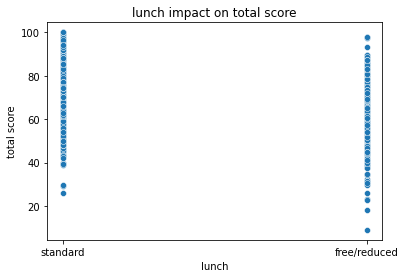

                    mean      median         std
             total score total score total score
lunch                                           
free/reduced   62.198310        62.7   14.457969
standard       70.836279        71.3   13.186544
T-statistic: 9.574990678715867
P-value: 7.745187551390862e-21


In [47]:
#scatter plot for lunch and total score
sns.scatterplot(data = df, x = 'lunch' , y = 'total score')
plt.xlabel('lunch')
plt.ylabel('total score')
plt.title('lunch impact on total score')
plt.show()

#pivot table 
pivot_table = df.pivot_table(index='lunch', values='total score', aggfunc=['mean', 'median', 'std'])
print(pivot_table)

#create two dinstinct group by lunch status 
standard_lunch = df[df['lunch'] == 'standard']['total score']
reduced_lunch = df[df['lunch'] == 'free/reduced']['total score']

#T-test 
t_statistic, p_value = ttest_ind(standard_lunch, reduced_lunch)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

As the grpah shows, students with free/reduced lunch received significantly lower score compare to students with standard lunch. and P-value from T-test is lower than 0.001 provide sufficient evidence to prove that there is a relationship between lunch and test score. 

Fianlly Ethnicity and total score

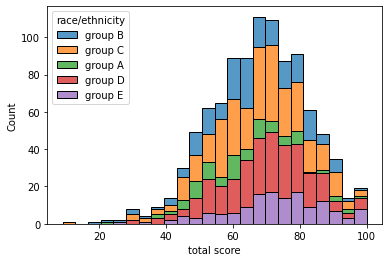

                      mean      median         std
               total score total score total score
race/ethnicity                                    
group A          62.988764        61.3   14.448902
group B          65.470000        65.0   14.733527
group C          67.130721        68.3   13.871086
group D          69.179389        70.0   13.250497
group E          72.748571        73.5   14.566605


In [49]:
#histogram for how each group of ethnicity spreads on score  
sns.histplot(data= df, x = 'total score', hue = 'race/ethnicity', multiple='stack')
plt.show()

#statistic table
pivot_table = df.pivot_table(index='race/ethnicity', values='total score', aggfunc=['mean', 'median', 'std'])
print(pivot_table)

Graph shows almsot evenly spread for each ethniciticy, but we can clearly observe that Group E have higher presence in the upper 
score compare to other groups

Bar plot for ethnicity and lunch together

<AxesSubplot:xlabel='race/ethnicity', ylabel='total score'>

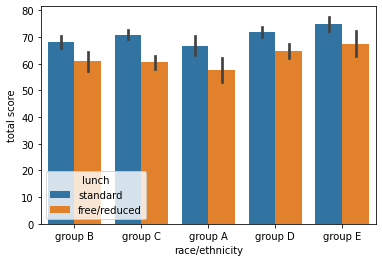

In [14]:
#Seaborn barplot 
sns.barplot(x='race/ethnicity', y='total score', hue = 'lunch', data=df)


this graph clearly shows that students with standard lunch received higher score compare to students with free/reduced lunch for every group 
Group E received distinctly higher score compare to other groups, and rest of the groups received similar average scores.